<a href="https://colab.research.google.com/github/JunsooJung/Python25Study/blob/main/02_01_%ED%9B%88%EB%A0%A8%EC%84%B8%ED%8A%B8_%ED%85%8C%EC%8A%A4%ED%8A%B8%EC%84%B8%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

지도학습은 정답(타깃)이 있으니 알고리즘이 정답을 맞히는 것을 학습함
비지도학습은 타깃 없이 입력 데이터만 사용함(정답을 사용하지 않음)
무언가를 맞힐 수 없으나 대신 데이터를 잘 파악하거나 변형하는데 도움을 줌

ai는 100점을 원하면 안됨! -> 과대 적합 -> 85%~90%????

머신러닝에서 알고리즘 성능을 제대로 평가하려면 훈련데이터와 평가데이터를 나누어 학습
평가를 위해서 또 다른 데이터를 준비하거나 이미 준비된 데이터 중에서 일부를 떼어 활용

우리는 이미 준비된 데이터 중에서 일부를 떼어 훈련용과 테스트용을 나누겠다.

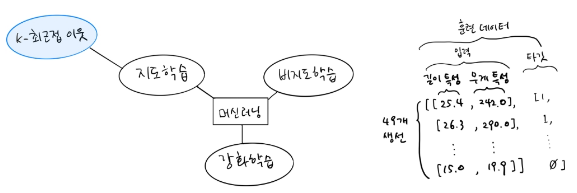

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.color_palette("YlOrBr", as_cmap=True)

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
bream = pd.DataFrame({'length': bream_length, 'weight': bream_weight})

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
smelt = pd.DataFrame({'length': smelt_length, 'weight': smelt_weight})

fish = pd.concat([bream,smelt],keys=['bream','smelt'], names=['type']).reset_index(level='type').reset_index(drop=True)
fish['type'] = fish['type'].map({'bream':0, 'smelt':1})
fish.head()

,type,length,weight
0,0,25.4,242.0
1,0,26.3,290.0
2,0,26.5,340.0
3,0,29.0,363.0
4,0,29.0,430.0


In [ ]:
k = KNeighborsClassifier()

print(fish[4:5])

    type  length  weight
4  bream    29.0   430.0


In [ ]:
print(fish[0:5])

    type  length  weight
0  bream    25.4   242.0
1  bream    26.3   290.0
2  bream    26.5   340.0
3  bream    29.0   363.0
4  bream    29.0   430.0


In [ ]:
print(fish[:5])

    type  length  weight
0  bream    25.4   242.0
1  bream    26.3   290.0
2  bream    26.5   340.0
3  bream    29.0   363.0
4  bream    29.0   430.0


In [ ]:
print(fish[44:])

     type  length  weight
44  smelt    12.2    12.2
45  smelt    12.4    13.4
46  smelt    13.0    12.2
47  smelt    14.3    19.7
48  smelt    15.0    19.9


In [ ]:
X_train, X_test, y_train, y_test = fish[:35], fish[35:], fish['type'][:35], fish['type'][35:]
k.fit(X_train, y_train)
k.score(X_test, y_test)



0.0

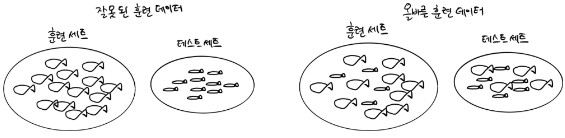

In [ ]:
kprd = k.predict(X_test)
accuracy_score(y_test, kprd)

0.0

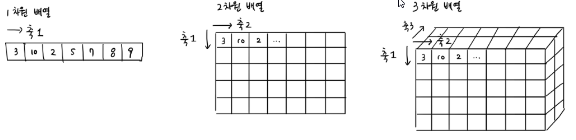

In [ ]:
X = fish[["length","weight"]]
y = fish["type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
input_arr =np.array(X)
target_arr = np.array(y)

print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
print(input_arr.shape)

(49, 2)


In [ ]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)
print(index)


[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [ ]:
train_input =input_arr[index[:35]]
train_target =target_arr[index[:35]]


In [ ]:
print(input_arr[13],train_input[0])

[ 32. 340.] [ 32. 340.]


In [ ]:
test_input =input_arr[index[35:]]
test_target =target_arr[index[35:]]


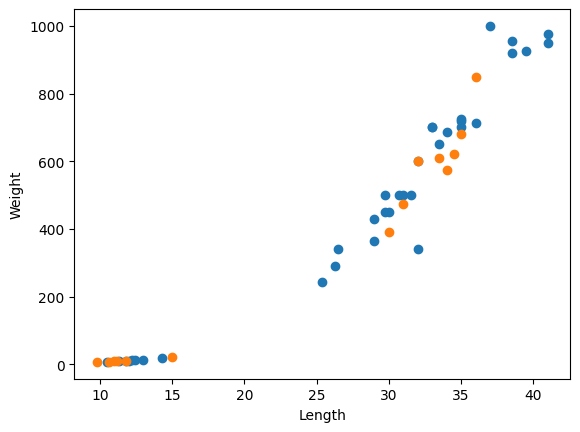

In [ ]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

In [ ]:
k.fit(train_input,train_target)
k.score(test_input,test_target)

1.0

In [ ]:
k.predict(test_input)
test_target

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1])

In [ ]:
k.predict([[25,150]])

array([1])